In [ ]:
import sympy as sp

V_m, R, T, a, b = sp.symbols('V_m R T a b')
P = sp.symbols('P')

# Peng-Robinson equation of state
P_eq = (R * T / (V_m - b)) - (a / (V_m * (V_m + b) + b * (V_m - b)))

integral = sp.integrate(P_eq, V_m)

integral_result = sp.simplify(integral)
integral_result




Total work done by the Stirling engine: -0.09 J
Isothermal efficiency: -0.12
Carnot efficiency: 0.6


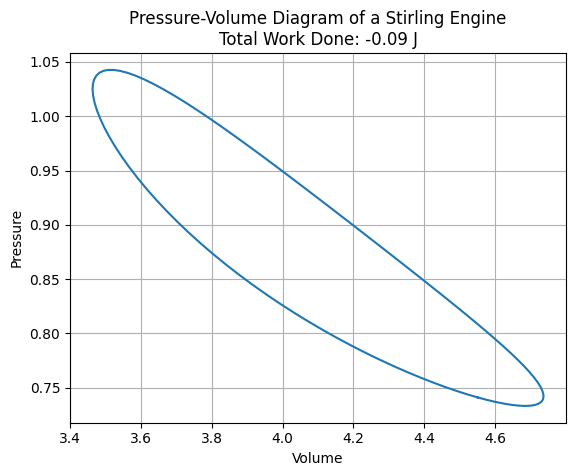

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
V_CLEARANCE = 0.01    # Reserved volume
V_SWEPT = 0.9       # Swept volume
V_K = 1             # Volume for isothermal processes (heater, cooler, regenerator)
V_R = 1
V_H = 1

# Isothermal Stirling engine efficiency (Carnot efficiency)
def carnot_efficiency(hot_temp: float, cold_temp: float) -> float:
    return 1.0 - cold_temp / hot_temp

# Assuming a simple sinusoidal volume change for alpha configuration
def compression_volume(theta: float) -> float:
    return V_CLEARANCE + V_SWEPT*(1 + np.cos(theta))/2.

def expansion_volume(theta: float, alpha=np.pi/2) -> float:
    return V_CLEARANCE + V_SWEPT * (1+ np.cos(theta + alpha))/2.

# Engine parameters
SPEED = 1.0
LOAD = 1.0
MASS = 1
PRESSURE = 10
ITER_COUNT = 0
MAX_ITER = 100

# Temperatures (K)
TEMP_HOT = 500          # Temperature of the hot source
TEMP_COLD = 200         # Temperature of the cold source
MASS_AIR = 0.00144      # Mass in kg 
GAS_CONSTANT = 8.314    # Universal gas constant (J/(mol·K))

# Intermediate temperatures
TEMP_COLD_COMP = TEMP_COLD
TEMP_EXP = TEMP_HOT
TEMP_REG = (TEMP_HOT - TEMP_COLD) / np.log(TEMP_HOT / TEMP_COLD)

# Crank angles and corresponding pressures and volumes
crank_angles = np.linspace(0, 2 * np.pi, 100)
pressures = np.zeros_like(crank_angles)
volumes = np.zeros_like(crank_angles)

# Calculate pressures and volumes at different crank angles
for i, alpha in enumerate(crank_angles):
    p = (MASS_AIR * GAS_CONSTANT) / (
        (compression_volume(alpha) / TEMP_COLD_COMP) + 
        (V_K / TEMP_COLD) + 
        (V_R / TEMP_REG) + 
        (V_H / TEMP_HOT) + 
        (expansion_volume(alpha) / TEMP_EXP)
    )
    volumes[i] = (compression_volume(alpha) + V_K + V_R + V_H + expansion_volume(alpha))
    pressures[i] = p

Wc, We = np.trapz(pressures[:50], volumes[:50]), np.trapz(pressures[50:], volumes[50:]) 
work_done = Wc + We
Qc, Qe = Wc, We
isothermal_efficiency = work_done/Qe
print(f'Total work done by the Stirling engine: {work_done:.2f} J')
print(f'Isothermal efficiency: {isothermal_efficiency:.2f}')
print(f'Carnot efficiency: {carnot_efficiency(TEMP_HOT, TEMP_COLD)}')


# Plot pressure vs. volume
plt.plot(volumes, pressures)
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title(f'Pressure-Volume Diagram of a Stirling Engine\nTotal Work Done: {work_done:.2f} J')
plt.grid(True)
plt.show()


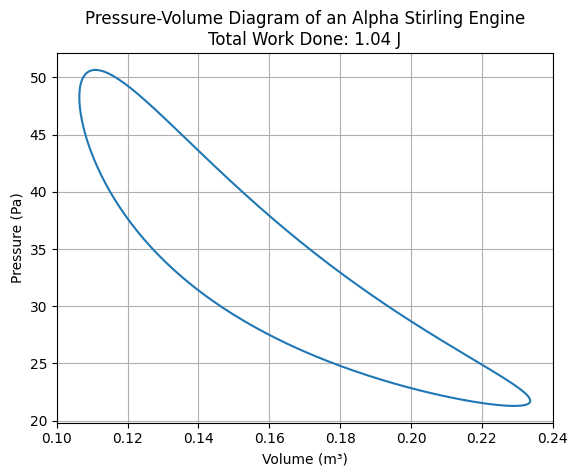

Total work done by the Stirling engine: 1.04 J
Isothermal efficiency: 0.46
Carnot efficiency: 0.57


In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Ve_dead = 0.01    # Expansion cylinder dead volume (in m³)
Vc_dead = 0.01    # Compression cylinder dead volume (in m³)
Ve_swept = 0.09   # Expansion cylinder swept volume (in m³)
Vc_swept = 0.09   # Compression cylinder swept volume (in m³)
Vr = 0.02         # Regenerator volume (in m³)
Vk = 0.02         # Cooler volume (in m³)
Vh = 0.02         # Heater volume (in m³)
Th = 700          # Temperature of the hot source (K)
Tk = 300          # Temperature of the cold source (K)
M = 0.00144       # Mass in kg
R = 8.314         # Universal gas constant (J/(mol·K))

# Intermediate temperatures
Tc, Te = Tk, Th 
Tr = (Th - Tk) / np.log(Th / Tk)

# Crank angles and corresponding pressures and volumes
n_points = 300
crank_angles = np.linspace(0, 2 * np.pi, n_points)
pressures = np.zeros_like(crank_angles)
volumes = np.zeros_like(crank_angles)

def expansion_volume(theta):
    return Ve_dead + Ve_swept * (1 + np.sin(theta)) / 2

def compression_volume(theta):
    return Vc_dead + Vc_swept * (1 + np.cos(theta)) / 2

# Calculate pressures and volumes at different crank angles
for i, alpha in enumerate(crank_angles):
    p = (M * R) / (
        (compression_volume(alpha) / Tc) + 
        (Vk / Tk) + 
        (Vr / Tr) + 
        (Vh / Th) + 
        (expansion_volume(alpha) / Te)
    )
    volumes[i] = (compression_volume(alpha) + expansion_volume(alpha) + Vh + Vk + Vr)
    pressures[i] = p

# Calculate the total work done as the area under the PV curve
work_done = -np.trapz(pressures, volumes)

# Plot pressure vs. volume
plt.plot(volumes, pressures)
plt.xlabel('Volume (m³)')
plt.ylabel('Pressure (Pa)')
plt.title(f'Pressure-Volume Diagram of an Alpha Stirling Engine\nTotal Work Done: {work_done:.2f} J')
plt.grid(True)
plt.show()


# Calculate the isothermal efficiency
Qc = np.trapz(pressures[:int(n_points/2)], volumes[:int(n_points/2)])
Qh = np.trapz(pressures[int(n_points/2):], volumes[int(n_points/2):])
isothermal_efficiency = work_done / Qh

# Calculate the Carnot efficiency
def carnot_efficiency(hot_source_temp, cold_source_temp):
    return 1.0 - cold_source_temp / hot_source_temp

carnot_eff = carnot_efficiency(Th, Tk)
print(f'Total work done by the Stirling engine: {work_done:.2f} J')
print(f'Isothermal efficiency: {isothermal_efficiency:.2f}')
print(f'Carnot efficiency: {carnot_eff:.2f}')

